# Using Policy Based Methods to solve CartPole-v0 OpenAI gym environment

This notebook explores the effectiveness of various policy based methods in solving the classic Cartpole environment.
Some common policy-based algorithms are:
* hill climbing
* steepest ascent hill climbing
* simulated annealing
* adaptive noise scaling
* cross-entropy method
* evolution strategies

In [1]:
import gym
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.distributions import Categorical

### Exploring the environment

In [2]:
env = gym.make('CartPole-v0')
print(f'Observation space: {env.observation_space}')
print(f'Action space: {env.action_space}')

Observation space: Box(4,)
Action space: Discrete(2)


### Hill Climbing with Adaptive Noise Scaling

In [3]:
from hill_climbing_ans import Agent

In [6]:
# Training the agent with stochastic policy search
env = gym.make('CartPole-v0')
env.seed(0)
np.random.seed(0)

agent = Agent()
scores = agent.learn(env)

Episode 100	Average Score: 175.24
Environment solved in 13 episodes!	Average Score: 196.21


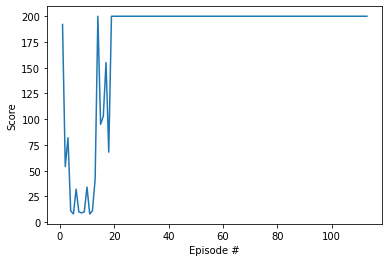

In [7]:
# Plotting the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

### Cross-Entropy Method

In [2]:
from cross_entropy import Agent

Episode 10	Average Score: 65.60
Episode 20	Average Score: 111.80
Episode 30	Average Score: 141.20
Episode 40	Average Score: 155.90
Episode 50	Average Score: 164.72
Episode 60	Average Score: 170.60
Episode 70	Average Score: 174.80
Episode 80	Average Score: 177.95
Episode 90	Average Score: 180.40
Episode 100	Average Score: 182.36
Episode 110	Average Score: 195.80

Environment solved in 10 iterations!	Average Score: 195.80


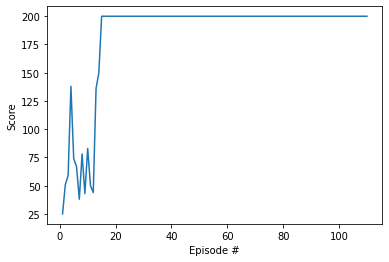

In [3]:

env = gym.make('CartPole-v0')
env.seed(101)
np.random.seed(101)

agent = Agent(env)
scores = agent.learn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [4]:
# Observe the trained agent
env = gym.make('CartPole-v0')
env.seed(101)
np.random.seed(101)

agent = Agent(env)
# load the weights from file
agent.load_state_dict(torch.load('./saved_models/checkpoint_sem.pth'))

state = env.reset()
while True:
    state = torch.from_numpy(state).float()
    with torch.no_grad():
        action = agent.act(state)
    env.render()
    next_state, reward, done, _ = env.step(action)
    state = next_state
    if done:
        break

env.close()

### REINFORCE

In [2]:
from reinforce import Agent

In [5]:
env = gym.make('CartPole-v0')
env.seed(0)

agent = Agent()

scores = agent.learn(env, n_episodes=2000)

Episode 100	Average Score: 28.45
Episode 200	Average Score: 47.91
Episode 300	Average Score: 64.71
Episode 400	Average Score: 108.99
Episode 500	Average Score: 164.96
Episode 600	Average Score: 189.32
Episode 700	Average Score: 129.91
Episode 800	Average Score: 153.58
Episode 900	Average Score: 134.91
Environment solved in 896 episodes!	Average Score: 195.32


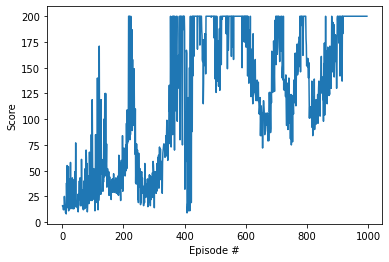

In [6]:
# Plotting the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [8]:
# Watching the trained agent
env = gym.make('CartPole-v0')

state = env.reset()
for t in range(1000):
    action, _ = agent.act(state)
    env.render()
    state, reward, done, _ = env.step(action)
    if done:
        break 

env.close()